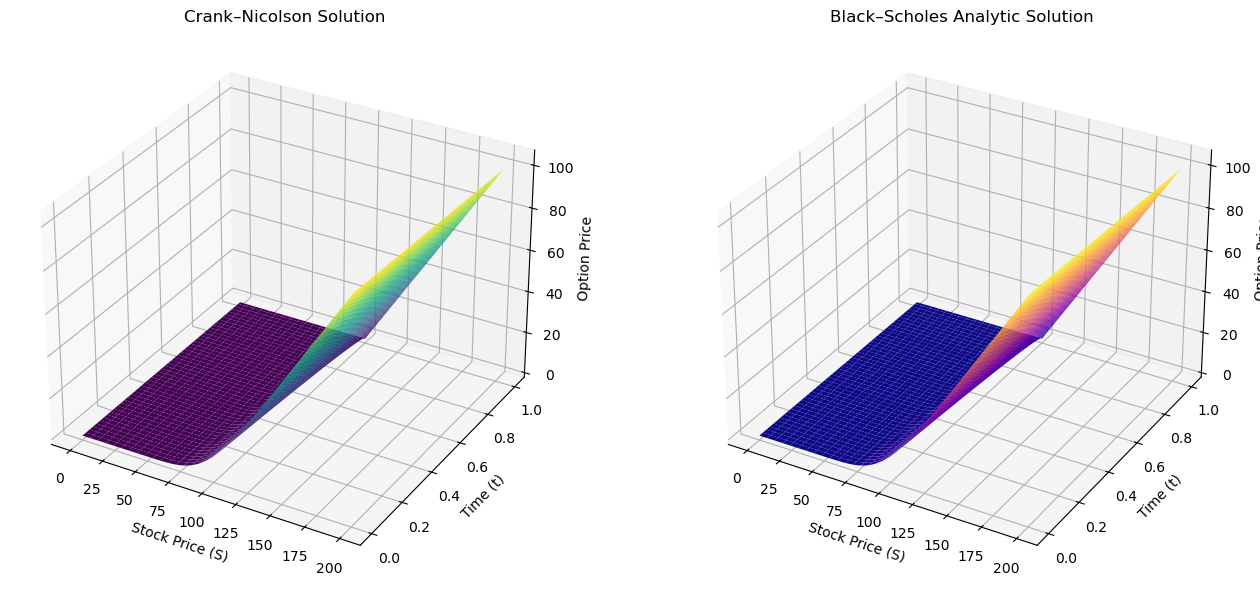

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load CSVs (each row is a time step, each column is a stock price)
fd = np.loadtxt("../data/output_fd.csv", delimiter=",") # Finite Difference
bs = np.loadtxt("../data/output_analytic.csv", delimiter=",") # Analytic Solution

# Create axes
Nt, Nx = fd.shape[0] - 1, fd.shape[1] - 1
T, S_max = 1.0, 200  # Should match OptionParams in C++

t = np.linspace(0, T, Nt + 1)            # time axis
S = np.linspace(0, S_max, Nx + 1)        # stock price axis

# Create meshgrid
T_mesh, S_mesh = np.meshgrid(t, S, indexing='ij')

# Plot both surfaces
fig = plt.figure(figsize=(14, 6))

# --- Plot Crank-Nicolson ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, fd, cmap='viridis')
ax1.set_title("Crank–Nicolson Solution")
ax1.set_xlabel("Stock Price (S)")
ax1.set_ylabel("Time (t)")
ax1.set_zlabel("Option Price")

# --- Plot Analytic ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, bs, cmap='plasma')
ax2.set_title("Black–Scholes Analytic Solution")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Time (t)")
ax2.set_zlabel("Option Price")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Absolute Error Between CN and Analytic')

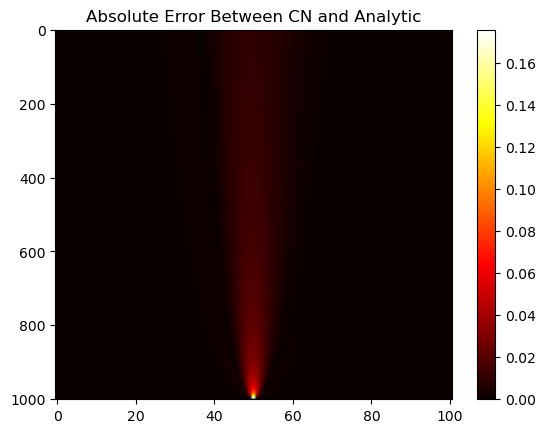

In [14]:
diff = fd - bs

plt.imshow(np.abs(diff), cmap="hot", aspect="auto")
plt.colorbar()
plt.title("Absolute Error Between CN and Analytic")
